In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import textwrap

# Reading Dataframe


In [2]:
df = pd.read_csv('../data/clean/stats_salaries.csv')
df.head()

,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,TO,PF,PTS,PLUS_MINUS,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE_EST,SEASON_START,WON_GAME,INFLATION_ADJ_SALARY
0,1630162,Anthony Edwards,F,36:22,4.0,10.0,0.400,3.0,8.0,0.375,...,1.0,1.0,15.0,5.0,MIN,Minnesota Timberwolves,2022-03-12,2021,1,10245480
1,1630162,Anthony Edwards,F,34:27,9.0,19.0,0.474,4.0,11.0,0.364,...,0.0,3.0,25.0,-3.0,MIN,Minnesota Timberwolves,2022-03-11,2021,0,10245480
2,1630162,Anthony Edwards,F,25:29,7.0,15.0,0.467,2.0,8.0,0.250,...,4.0,2.0,16.0,7.0,MIN,Minnesota Timberwolves,2022-03-09,2021,1,10245480
3,1630162,Anthony Edwards,F,32:22,7.0,13.0,0.538,1.0,5.0,0.200,...,4.0,5.0,17.0,7.0,MIN,Minnesota Timberwolves,2022-02-28,2021,1,10245480
4,1630162,Anthony Edwards,F,37:46,5.0,13.0,0.385,1.0,6.0,0.167,...,2.0,3.0,15.0,-21.0,MIN,Minnesota Timberwolves,2022-02-25,2021,0,10245480


In [3]:
len(df)

492312

# Exploring and Removing Outliers

In [4]:
pd.set_option("display.max_columns", None)
df.agg([min, max])

C:\Users\alanx\AppData\Local\Temp/ipykernel_30520/675462980.py:2: FutureWarning: ['START_POSITION'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg([min, max])


,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE_EST,SEASON_START,WON_GAME,INFLATION_ADJ_SALARY
min,15,AJ Hammons,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-57.0,ATL,Atlanta Hawks,2003-10-28,2003,0,10549
max,1630267,Zylan Cheatham,9:60,28.0,50.0,1.0,14.0,24.0,1.0,26.0,39.0,1.0,18.0,25.0,31.0,25.0,10.0,12.0,12.0,6.0,81.0,57.0,WAS,Washington Wizards,2022-03-12,2021,1,45780966


removing outliers aka players that did not play 

In [5]:
len(df.loc[df['MIN'] == '0:00'])

89

In [6]:
df = df.loc[df['MIN'] != '0:00']
len(df)

492223

# Grouping Players and Seasons 

In [7]:
g = df.groupby(['PLAYER_NAME', 'SEASON_START']).mean()

In [8]:
g.head()

PLAYER_ID       FGM       FGA    FG_PCT      FG3M  \
PLAYER_NAME SEASON_START                                                      
AJ Hammons  2016          1627773.0  1.172414  2.620690  0.307724  0.172414   
AJ Price    2009           201985.0  2.589286  6.321429  0.388054  1.071429   
            2010           201985.0  2.309091  6.454545  0.355673  0.872727   
            2011           201985.0  1.250000  3.666667  0.281521  0.541667   
            2012           201985.0  2.824561  7.245614  0.370895  1.228070   

                              FG3A   FG3_PCT       FTM       FTA    FT_PCT  \
PLAYER_NAME SEASON_START                                                     
AJ Hammons  2016          0.413793  0.132172  0.310345  0.689655  0.129310   
AJ Price    2009          3.107143  0.305589  1.071429  1.339286  0.425304   
            2010          3.000000  0.266018  1.145455  1.654545  0.446964   
            2011          1.833333  0.193042  0.583333  0.729167  0.244792   
            2012          3.508772  0.299281  0.859649  1.087719  0.299404   

                              OREB      DREB       REB       AST       STL  \
PLAYER_NAME SEASON_START                                                     
AJ Hammons  2016          0.482759  1.586207  2.068966  0.241379  0.034483   
AJ Price    2009          0.214286  1.357143  1.571429  1.892857  0.625000   
            2010          0.327273  1.109091  1.436364  2.127273  0.581818   
            2011          0.291667  1.020833  1.312500  1.812500  0.416667   
            2012          0.350877  1.649123  2.000000  3.596491  0.578947   

                               BLK        TO        PF       PTS  PLUS_MINUS  \
PLAYER_NAME SEASON_START                                                       
AJ Hammons  2016          0.551724  0.482759  1.172414  2.827586    0.068966   
AJ Price    2009          0.053571  1.053571  0.946429  7.321429    0.875000   
            2010          0.018182  1.090909  1.200000  6.636364    0.218182   
            2011          0.041667  0.666667  0.625000  3.625000    0.562500   
            2012          0.052632  1.122807  1.280702  7.736842   -1.140351   

                          WON_GAME  INFLATION_ADJ_SALARY  
PLAYER_NAME SEASON_START                                  
AJ Hammons  2016          0.206897              732735.0  
AJ Price    2009          0.410714              576397.0  
            2010          0.418182              950085.0  
            2011          0.625000             1028406.0  
            2012          0.368421             1047959.0

In [9]:
#Graphing a scatter plot of a players salaries and their average points they scared for all the seasons they played 

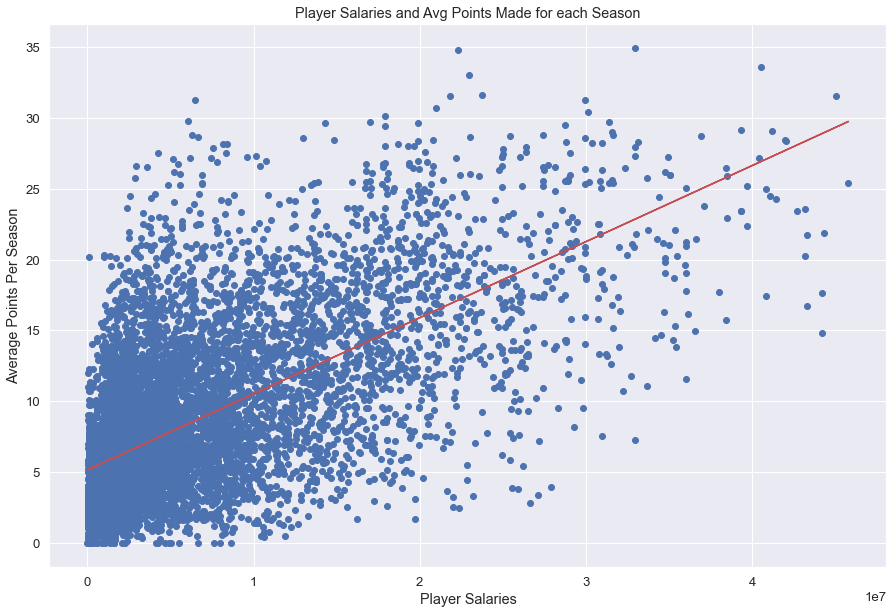

In [12]:
plt.figure(figsize=(15,10))
x = g['INFLATION_ADJ_SALARY'].values
y = g['PTS'].values
# g.plot.scatter(y='PTS', x='INFLATION_ADJ_SALARY')
plt.scatter(x, y)
a,b = np.polyfit(x,y, 1)
plt.plot(x, a*x+b, 'r')
plt.xlabel('Player Salaries')
plt.ylabel('Average Points Per Season')
plt.title('Player Salaries and Avg Points Made for each Season')
plt.show()

Running a pearson collreation to find if there are any highly linearly correlated columns

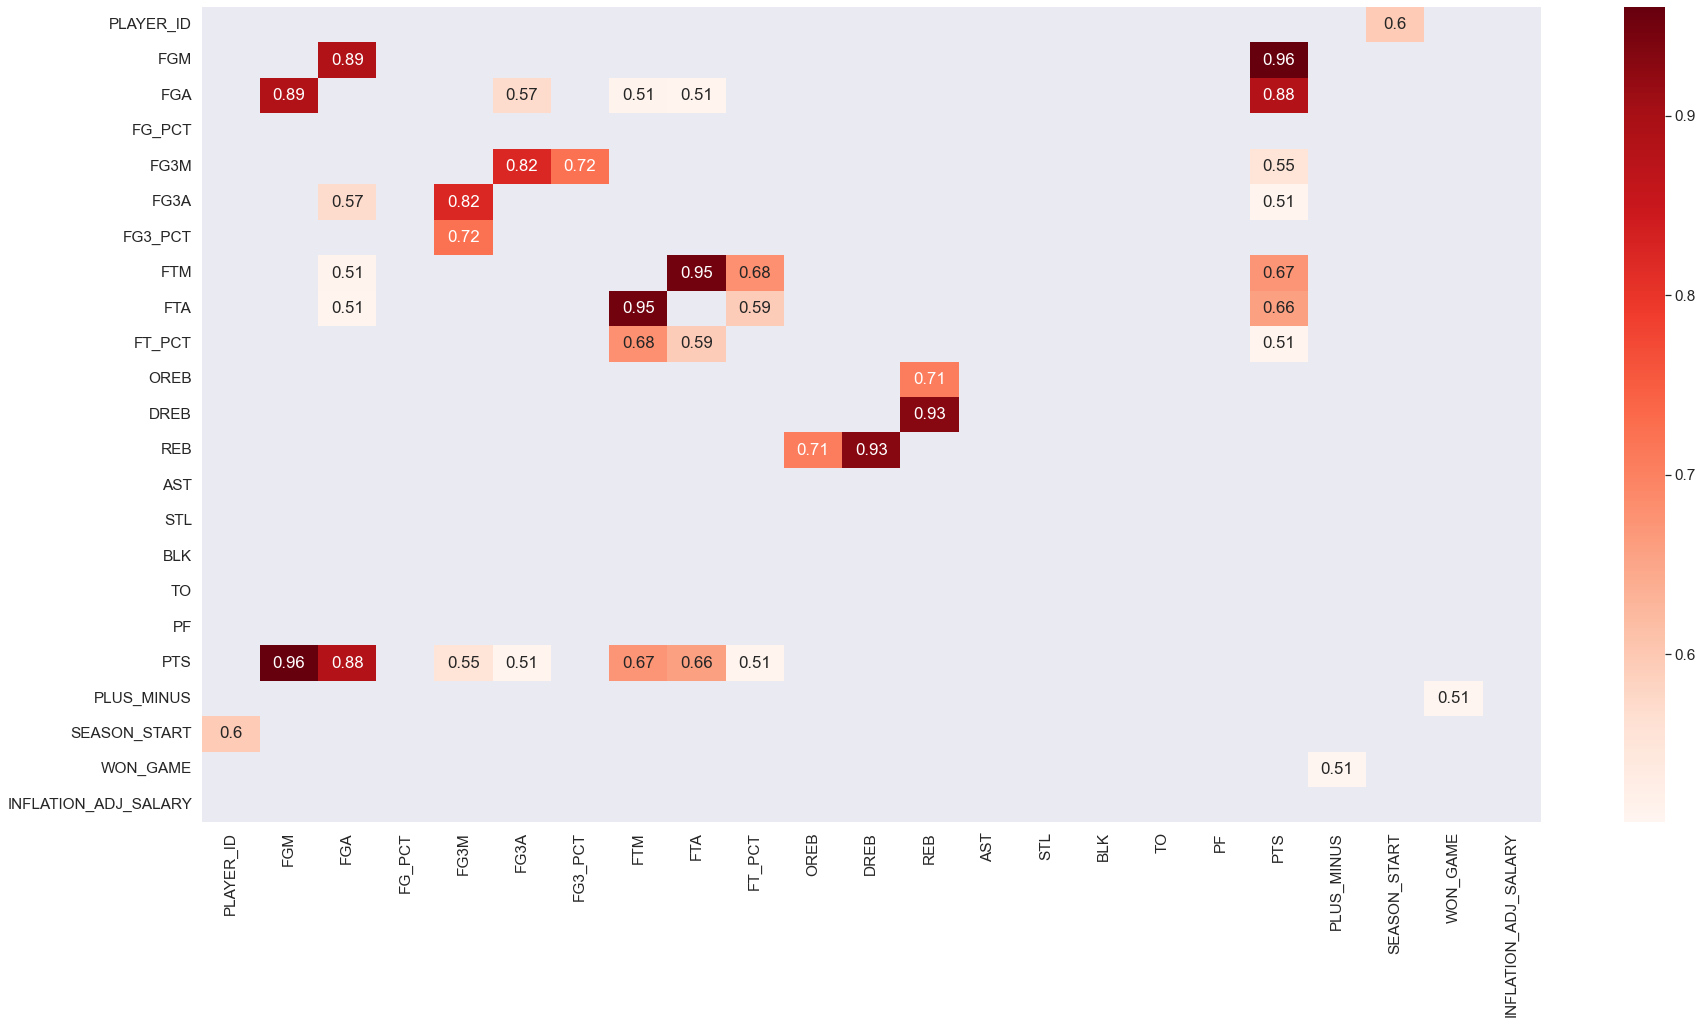

In [19]:
dfCorr = df.corr()
sn.set(font_scale=1.4)
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,15))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()